In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./df_preparedCLIM.csv')

In [4]:
df.head()

,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,...,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,2,31,3,27.7,84.1,7.9,1,65.0,1,0.0,...,-96.000334,42.589667,1,1,0,0,0,1,0.235294,400.590332
1,4,0,3,24.4,70.1,17.9,1,49.0,1,0.0,...,-93.377501,42.010502,0,1,0,0,0,1,0.047059,296.377899
2,4,0,3,20.7,63.4,20.6,1,62.0,1,0.0,...,-93.378668,42.013667,0,1,0,0,0,1,0.164706,307.136780
3,2,30,3,16.2,43.3,8.3,1,32.0,1,0.0,...,-94.456503,41.266668,0,0,0,0,0,1,0.101852,410.830414
4,2,20,3,21.0,63.1,9.1,1,51.0,1,0.0,...,-95.001836,41.247000,0,1,0,0,0,1,0.125000,380.345337


df['elevation'].isna().value_counts()

df.dropna(inplace = True)

In [6]:
df.shape

(12372, 22)

In [7]:
df['DETERIORATION_RATE'].describe()

count    1.237200e+04
mean     9.598108e-02
std      6.898821e-02
min      5.224579e-17
25%      4.705882e-02
50%      8.125000e-02
75%      1.274510e-01
max      6.250000e-01
Name: DETERIORATION_RATE, dtype: float64

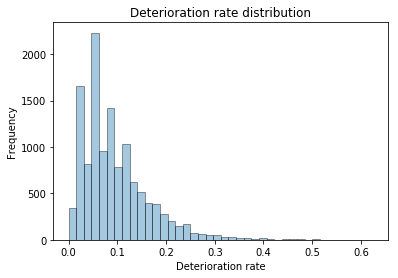

In [8]:
sns.distplot(df['DETERIORATION_RATE'], kde = False, bins = 40, hist_kws=dict(edgecolor="k"))
plt.title('Deterioration rate distribution')
plt.xlabel('Deterioration rate')
plt.ylabel('Frequency')
plt.show()

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions, because there is a long tail in the positive direction on the number line. 

The mean (0.096) is placed to the right (i.e. higher than) of the median (0.081).

df = df[df['DETERIORATION_RATE']<0.4]

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


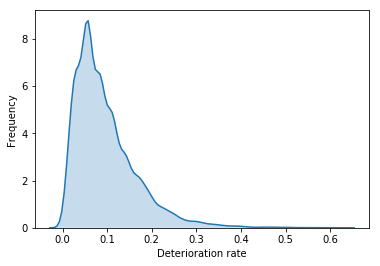

In [9]:
sns.distplot(df['DETERIORATION_RATE'], hist = False, kde_kws = {'shade':True}).set(xlabel = 'Deterioration rate', ylabel = 'Frequency')
plt.show()

In [10]:
y = np.array(df['DETERIORATION_RATE']).reshape(-1,1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_y = scaler.fit_transform(y)

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


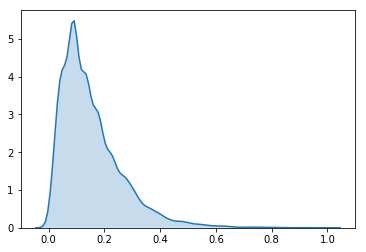

In [12]:
sns.distplot(scaled_y, hist = False, kde_kws = {'shade':True})
plt.show()

In [13]:
from scipy import stats
print(stats.describe(scaled_y))


DescribeResult(nobs=12372, minmax=(array([0.]), array([1.])), mean=array([0.15356973]), variance=array([0.01218399]), skewness=array([1.65613405]), kurtosis=array([4.30026011]))


In [14]:
np.array(scaled_y)

array([[0.37647059],
       [0.07529412],
       [0.26352941],
       ...,
       [0.29866667],
       [0.04444444],
       [0.01882353]])

In [15]:
df['DETERIORATION_RATE']=scaler.fit_transform(df[['DETERIORATION_RATE']].values)

In [16]:
df.head()

,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,...,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,2,31,3,27.7,84.1,7.9,1,65.0,1,0.0,...,-96.000334,42.589667,1,1,0,0,0,1,0.376471,400.590332
1,4,0,3,24.4,70.1,17.9,1,49.0,1,0.0,...,-93.377501,42.010502,0,1,0,0,0,1,0.075294,296.377899
2,4,0,3,20.7,63.4,20.6,1,62.0,1,0.0,...,-93.378668,42.013667,0,1,0,0,0,1,0.263529,307.136780
3,2,30,3,16.2,43.3,8.3,1,32.0,1,0.0,...,-94.456503,41.266668,0,0,0,0,0,1,0.162963,410.830414
4,2,20,3,21.0,63.1,9.1,1,51.0,1,0.0,...,-95.001836,41.247000,0,1,0,0,0,1,0.200000,380.345337


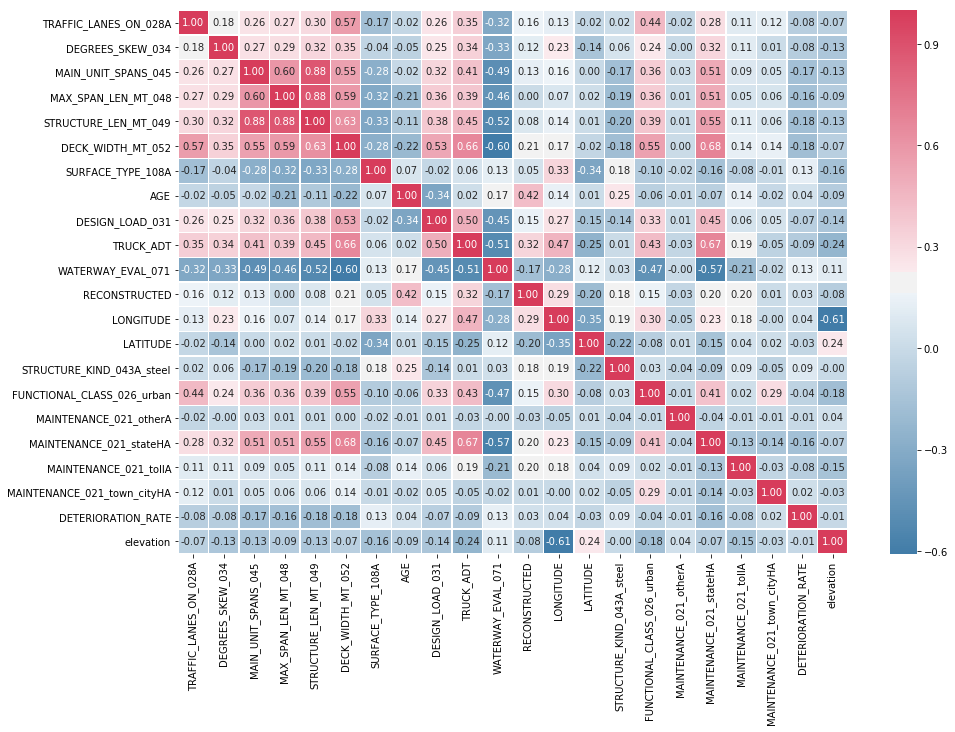

In [17]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

We can observe some correlations between the deterioration rate and deck width, span lengths, surface type and state highway agency maintenance. 

We can also see some strong correlations between independent variables. For instance: 

     - Structure length has a correlation of 88% with the number of spans and the maximum span length. 
     
     - Traffic lanes and deck width have a 57% correlation, which is evident since the bridge will be wider when increasing the number of lanes on it.
     
We will have to drop some of the variables that are strongly correlated between them. Since the maximum span length and the number of traffic lanes are less correlated with the deterioration rate, they will be dropped from our dataframe. 

In [18]:
list(df.columns)

['TRAFFIC_LANES_ON_028A',
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'WATERWAY_EVAL_071',
 'RECONSTRUCTED',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'MAINTENANCE_021_otherA',
 'MAINTENANCE_021_stateHA',
 'MAINTENANCE_021_tollA',
 'MAINTENANCE_021_town_cityHA',
 'DETERIORATION_RATE',
 'elevation']

In [19]:
col_drop = ['TRAFFIC_LANES_ON_028A','MAX_SPAN_LEN_MT_048']

In [20]:
df.drop(col_drop, axis =1, inplace = True)

In [21]:
df['MAIN_UNIT_SPANS_045'].describe()

count    12372.000000
mean         2.478500
std          1.800297
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max         30.000000
Name: MAIN_UNIT_SPANS_045, dtype: float64

In [22]:
df = df[df['MAIN_UNIT_SPANS_045']<11]

In [24]:
df.columns

Index(['DEGREES_SKEW_034', 'MAIN_UNIT_SPANS_045', 'STRUCTURE_LEN_MT_049',
       'DECK_WIDTH_MT_052', 'SURFACE_TYPE_108A', 'AGE', 'DESIGN_LOAD_031',
       'TRUCK_ADT', 'WATERWAY_EVAL_071', 'RECONSTRUCTED', 'LONGITUDE',
       'LATITUDE', 'STRUCTURE_KIND_043A_steel', 'FUNCTIONAL_CLASS_026_urban',
       'MAINTENANCE_021_otherA', 'MAINTENANCE_021_stateHA',
       'MAINTENANCE_021_tollA', 'MAINTENANCE_021_town_cityHA',
       'DETERIORATION_RATE', 'elevation'],
      dtype='object')

In [25]:
# We choose the columns we want to scale

col_norm = ['DEGREES_SKEW_034',
            'MAIN_UNIT_SPANS_045',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'AGE',
 'TRUCK_ADT',
 'LONGITUDE',
 'LATITUDE',
 'elevation']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in col_norm:
    df[col] = scaler.fit_transform(df[[col]].values)


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
df.head()

,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,0.313131,0.3,0.153513,0.051852,1,0.547009,1,0.0,1,0,0.298265,0.859023,1,1,0,0,0,1,0.376471,0.173377
1,0.000000,0.3,0.125959,0.175309,1,0.410256,1,0.0,1,0,0.395728,0.744132,0,1,0,0,0,1,0.075294,0.102616
2,0.000000,0.3,0.112773,0.208642,1,0.521368,1,0.0,2,0,0.395685,0.744759,0,1,0,0,0,1,0.263529,0.109921
3,0.303030,0.3,0.073214,0.056790,1,0.264957,1,0.0,1,0,0.355633,0.596575,0,0,0,0,0,1,0.162963,0.180331
4,0.202020,0.3,0.112183,0.066667,1,0.427350,1,0.0,1,1,0.335369,0.592673,0,1,0,0,0,1,0.200000,0.159631


In [27]:
df.describe()

,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
count,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.000000,12291.00000,12291.000000,12291.000000,12291.000000,12291.000000
mean,0.119964,0.239753,0.082157,0.090200,1.190220,0.416636,1.359206,0.026873,1.159385,0.257180,0.521119,0.550068,0.783663,0.206574,0.003092,0.34627,0.029452,0.035310,0.153488,0.136273
std,0.168292,0.146263,0.086768,0.074982,0.410725,0.162480,0.751191,0.075399,0.792292,0.437097,0.242260,0.205203,0.411764,0.404864,0.055519,0.47580,0.169078,0.184571,0.110112,0.099220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.100000,0.015548,0.045679,1.000000,0.290598,1.000000,0.000000,1.000000,0.000000,0.314083,0.421808,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.075294,0.082201
50%,0.000000,0.300000,0.065932,0.066667,1.000000,0.418803,2.000000,0.000904,1.000000,0.000000,0.439087,0.572637,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.130000,0.119190
75%,0.232323,0.300000,0.118087,0.112346,1.000000,0.521368,2.000000,0.012972,2.000000,1.000000,0.780834,0.646813,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.203627,0.154026
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


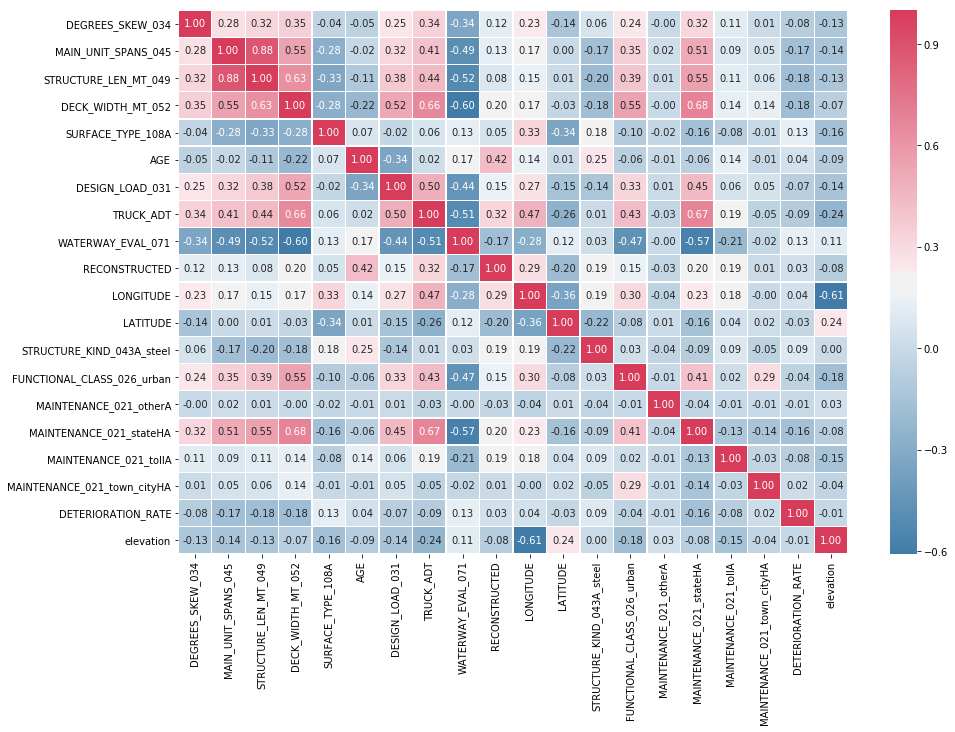

In [28]:
corr_matrix = df.corr('spearman')
fig, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(240,5, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

In [30]:
# Shuffle our dataframe first since bridges are ordered by state code in the df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
df.head()

,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,AGE,DESIGN_LOAD_031,TRUCK_ADT,WATERWAY_EVAL_071,RECONSTRUCTED,LONGITUDE,LATITUDE,STRUCTURE_KIND_043A_steel,FUNCTIONAL_CLASS_026_urban,MAINTENANCE_021_otherA,MAINTENANCE_021_stateHA,MAINTENANCE_021_tollA,MAINTENANCE_021_town_cityHA,DETERIORATION_RATE,elevation
0,0.00000,0.3,0.113364,0.049383,1,0.452991,0,0.000000,2,0,0.219853,0.763373,1,0,0,0,0,0,0.026667,0.274665
1,0.00000,0.2,0.037788,0.037037,1,0.470085,0,0.000000,2,0,0.443800,0.462838,1,0,0,0,0,0,0.151111,0.064193
2,0.00000,0.1,0.011415,0.035802,1,0.709402,2,0.000000,2,0,0.316665,0.979270,1,0,0,0,0,0,0.170000,0.202461
3,0.59596,0.7,0.473332,0.118519,1,0.239316,2,0.005473,1,0,0.733921,0.171989,1,1,0,1,0,0,0.307692,0.058693
4,0.00000,0.1,0.005904,0.061728,1,0.213675,2,0.000000,2,0,0.285086,0.645837,1,0,0,0,0,0,0.188235,0.143734


In [32]:
list(df.columns)

['DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'WATERWAY_EVAL_071',
 'RECONSTRUCTED',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'MAINTENANCE_021_otherA',
 'MAINTENANCE_021_stateHA',
 'MAINTENANCE_021_tollA',
 'MAINTENANCE_021_town_cityHA',
 'DETERIORATION_RATE',
 'elevation']

In [33]:
# Data Preparation
X = df[[
 'DEGREES_SKEW_034',
 'MAIN_UNIT_SPANS_045',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'WATERWAY_EVAL_071',
 'RECONSTRUCTED',
 'LONGITUDE',
 'LATITUDE',
 'STRUCTURE_KIND_043A_steel',
 'FUNCTIONAL_CLASS_026_urban',
 'MAINTENANCE_021_otherA',
 'MAINTENANCE_021_stateHA',
 'MAINTENANCE_021_tollA',
 'MAINTENANCE_021_town_cityHA',
 'elevation']] 

y = df['DETERIORATION_RATE'] 

In [34]:
# Split into train and test
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [36]:
X_train.shape

(9832, 19)

In [37]:
# Mean model - predicts the average of the labels in the training data

pred1 = y_train.mean()
pred1

0.1533020024460597

In [38]:
dfr=pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred1

In [39]:
dfr.head()

,y_real,y_pred1
3013,0.044444,0.153302
10014,0.228571,0.153302
8387,0.235294,0.153302
2629,0.062745,0.153302
4607,0.169412,0.153302


In [40]:
# Mean Absolute Error for mean model

dfr['resid1'] = np.abs(dfr['y_real']-dfr['y_pred1'])
dfr['resid1'].mean()

0.08290208219375839

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,dfr['y_pred1'])

0.08290208219375854

In [42]:
# Mean Squared Error for mean model
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,dfr['y_pred1']))

0.1100174142607236

### Linear regression

In [43]:
# Linear regression is the benchmark in a regression problem

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [44]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = reg.predict(X_test)

In [46]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.0792541850491069

In [47]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.10619825362555822

The fit of the linear regression model is better than the fit of the mean model.

In [52]:
# R2 score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.0757597023403801

R2 score is very low, which means that the features we are using as indepedent variables do not explain properly the deterioration rate of the bridges.

In [54]:
# Feature importance
reg_feature_list = pd.DataFrame(list(zip(X.columns,np.abs(reg.coef_))), columns = ['Feature','Importance'])
reg_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,MAINTENANCE_021_tollA,0.071503
1,DECK_WIDTH_MT_052,0.041534
2,MAINTENANCE_021_stateHA,0.037642
3,LONGITUDE,0.030498
4,MAIN_UNIT_SPANS_045,0.030277
5,TRUCK_ADT,0.027458
6,RECONSTRUCTED,0.023620
7,elevation,0.019865
8,SURFACE_TYPE_108A,0.016175
9,STRUCTURE_KIND_043A_steel,0.015820


### Ridge regularization

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = GridSearchCV(Ridge(),param_grid={"alpha": np.arange(0.5,100.5,0.5)},cv = 5)
ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0.5,   1. , ...,  99.5, 100. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
ridge.best_params_

{'alpha': 10.5}

In [58]:
ridge.best_estimator_

Ridge(alpha=10.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge_final = ridge.best_estimator_

In [60]:
r2_score(y_test,ridge_final.predict(X_test))

0.07676526346772161

In [61]:
np.sqrt(mean_squared_error(y_test,ridge_final.predict(X_test)))

0.10614046676107766

### K-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsRegressor

regknn = KNeighborsRegressor(n_neighbors=38)

regknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=38, p=2,
          weights='uniform')

In [60]:
mean_absolute_error(y_test,regknn.predict(X_test))

0.1300254156691297

In [61]:
np.sqrt(mean_squared_error(y_test,regknn.predict(X_test)))

0.16475725763123514

In [62]:
r2_score(y_test,regknn.predict(X_test))

0.09954721408935774

In [63]:
# Para ver que valor de k es el mejor tendré que ir probando
maes = []
for i in range(2,50):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

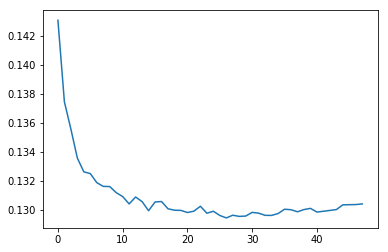

In [64]:
plt.plot(maes)

regknn10 = KNeighborsRegressor(n_neighbors=10)

regknn10.fit(X_train,y_train)

mean_absolute_error(y_test,regknn10.predict(X_test))

np.sqrt(mean_squared_error(y_test,regknn10.predict(X_test)))

regknn50 = KNeighborsRegressor(n_neighbors=50)

regknn50.fit(X_train,y_train)

np.sqrt(mean_squared_error(y_test,regknn50.predict(X_test)))

In [38]:
# GridSearchCV with RMSE score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={'n_neighbors':np.arange(3,40)}, scoring = 'neg_mean_squared_error')
reg_test.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
reg_test.best_params_

{'n_neighbors': 38}

In [40]:
reg_test.best_score_

-0.009520903870255603

In [42]:
np.sqrt(-reg_test.best_score_)

0.09757511911473951

In [41]:
reg_test.scoring

'neg_mean_squared_error'

In [43]:
reg_final = reg_test.best_estimator_

In [44]:
r2_score(y_test,reg_final.predict(X_test))

0.09540884813963446

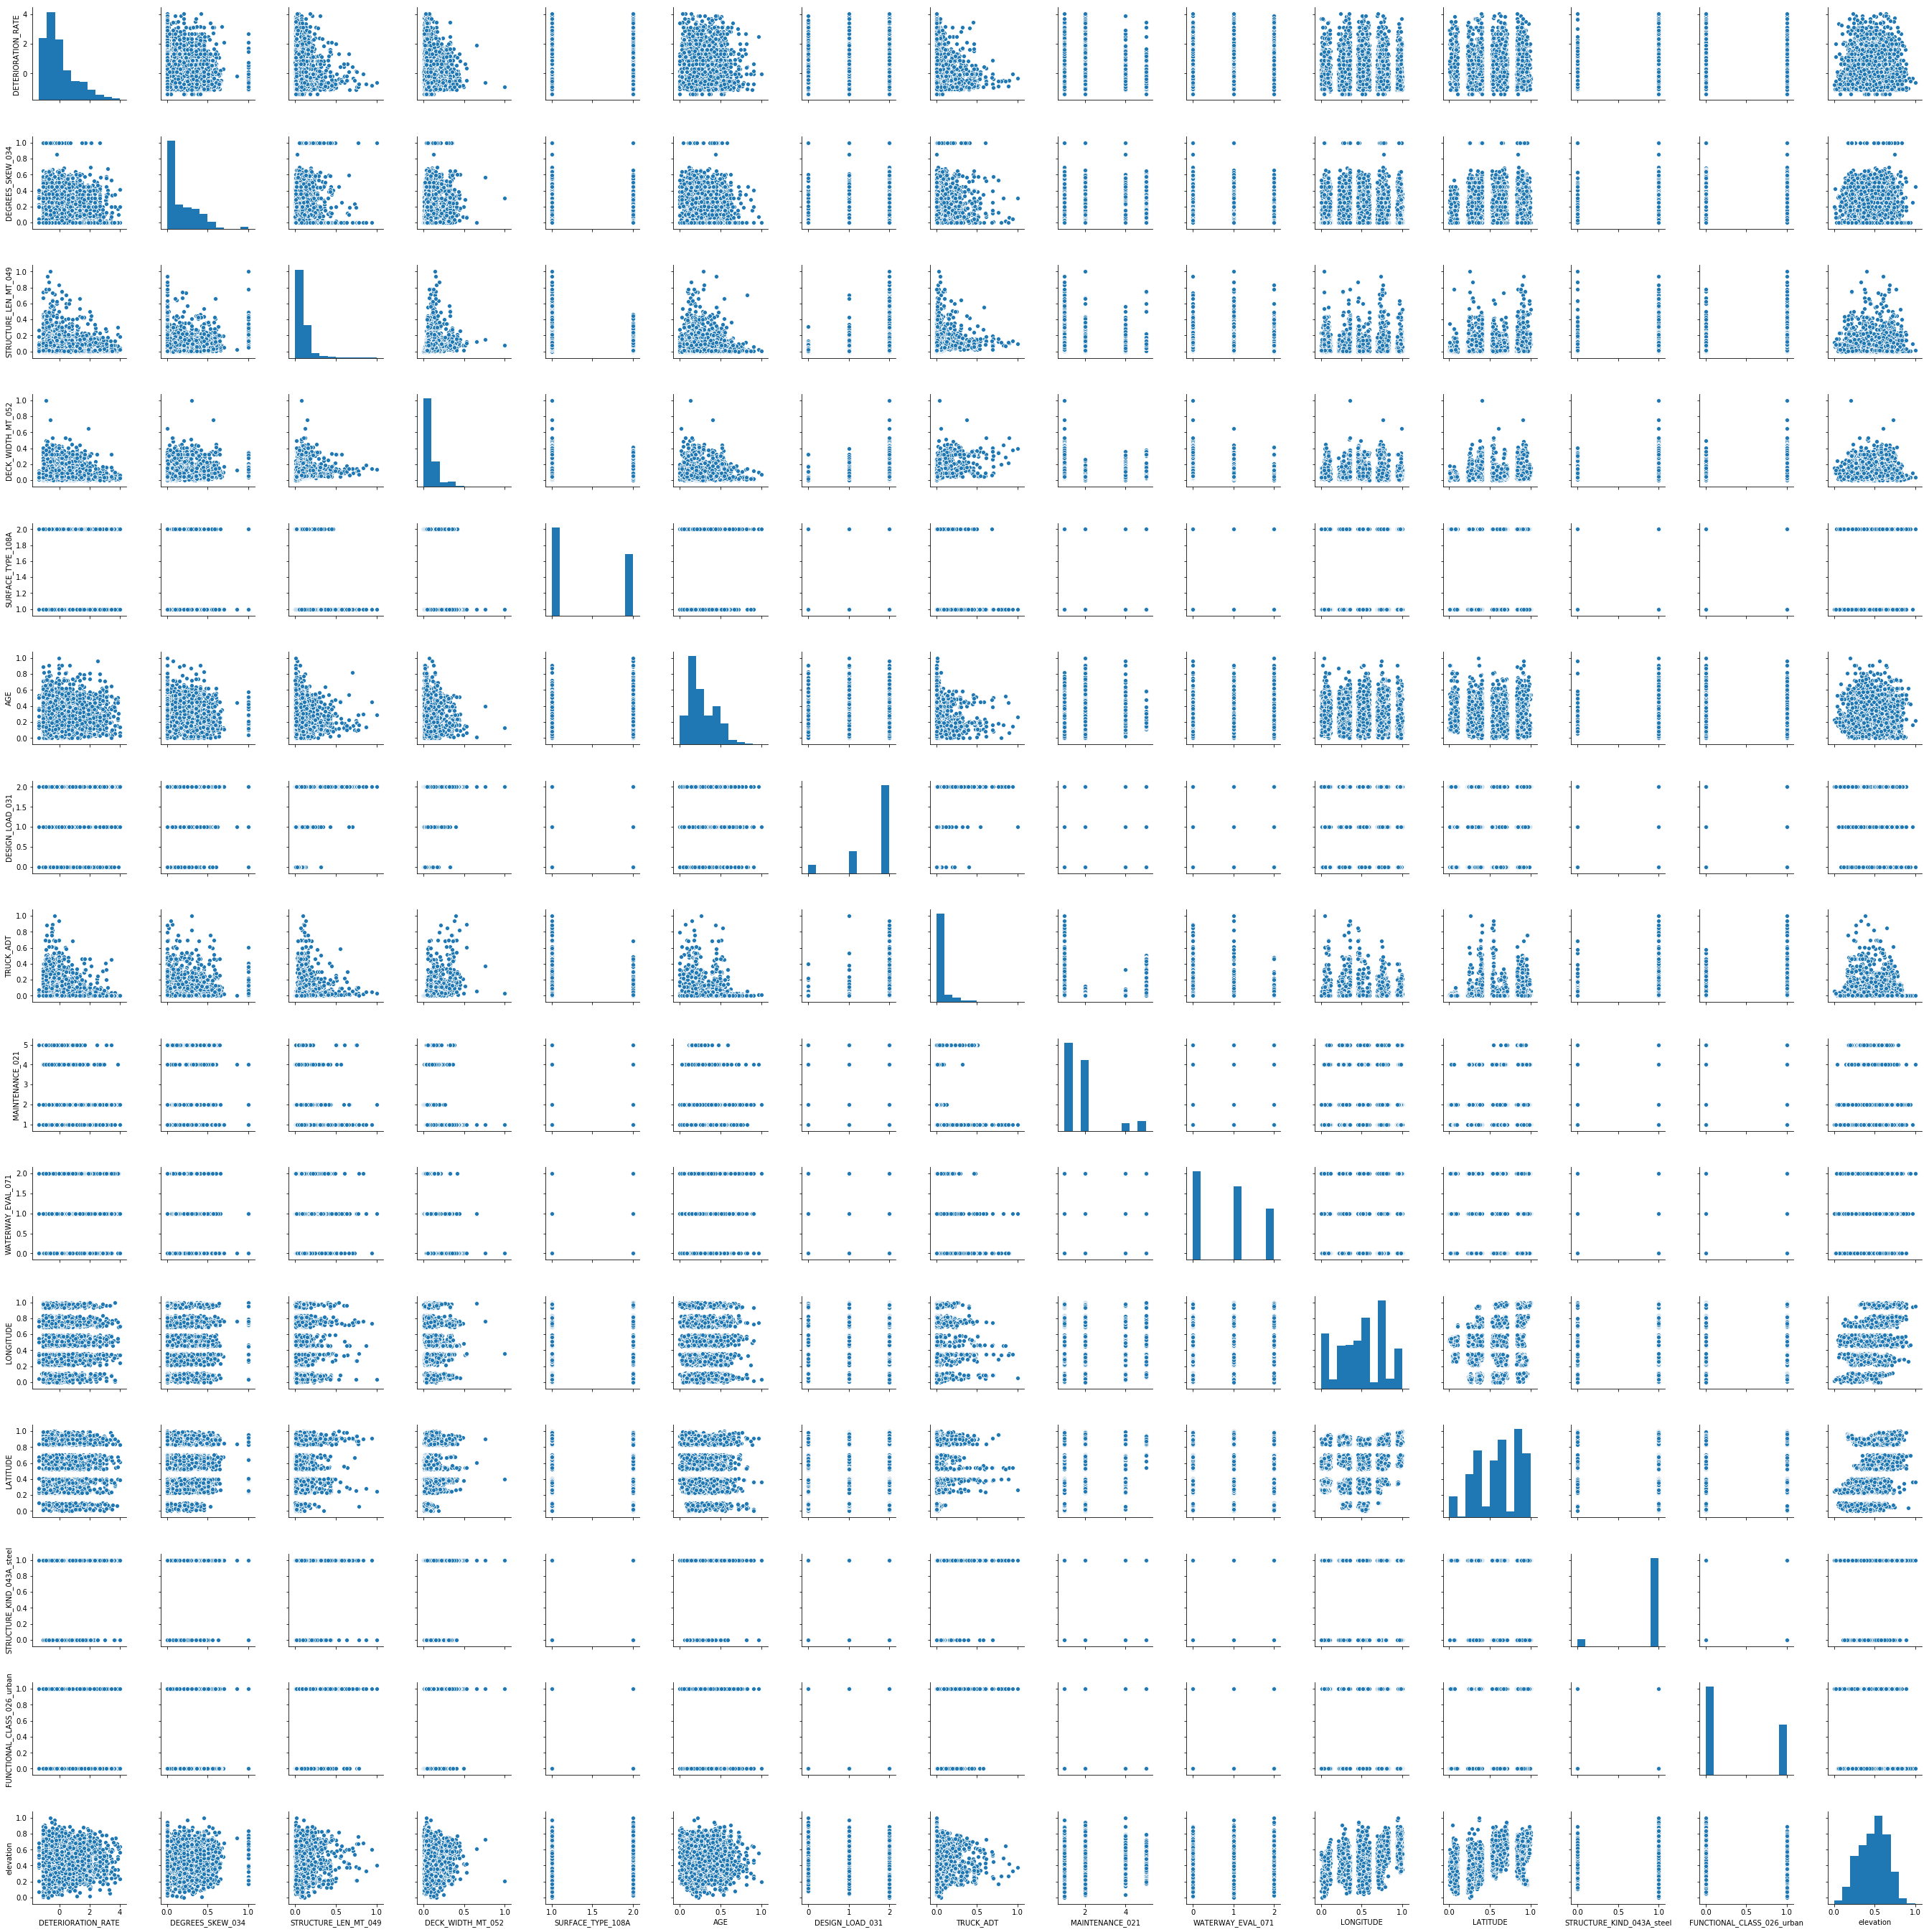

In [113]:
# Pair plot con solo OH
import seaborn as sns
sns.pairplot(df)

### Decission Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
regd_grid = GridSearchCV(DecisionTreeRegressor(),
                        param_grid={'max_depth': np.arange(2,10),
                                   'min_samples_leaf':[10,30,50,100]},
                         cv = 5,
                         scoring = 'neg_mean_absolute_error')

In [75]:
regd_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [76]:
np.sqrt(-regd_grid.best_score_)

0.2746319484983804

In [77]:
regd_final = regd_grid.best_estimator_

In [78]:
r2_score(y_test,regd_final.predict(X_test))

0.2189226259691981

### Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [70]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [71]:
np.sqrt(-reg.best_score_)

0.26964616597715596

In [72]:
reggb_final = reg.best_estimator_

In [73]:
r2_score(y_test,reggb_final.predict(X_test))

0.6563306905449657

In [80]:
reggb_final.feature_importances_

array([0.03467523, 0.02169248, 0.13697556, 0.07269565, 0.00761179,
       0.10633722, 0.01358028, 0.07268607, 0.00983415, 0.01353027,
       0.20912618, 0.15286299, 0.00478106, 0.00669978, 0.00130447,
       0.02325808, 0.00605167, 0.00414216, 0.10215489])

In [81]:
# Feature importance
rgb_feature_list = pd.DataFrame(list(zip(X.columns,reggb_final.feature_importances_)), columns = ['Feature','Importance'])
rgb_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,LONGITUDE,0.209126
1,LATITUDE,0.152863
2,STRUCTURE_LEN_MT_049,0.136976
3,AGE,0.106337
4,elevation,0.102155
5,DECK_WIDTH_MT_052,0.072696
6,TRUCK_ADT,0.072686
7,DEGREES_SKEW_034,0.034675
8,MAINTENANCE_021_stateHA,0.023258
9,MAIN_UNIT_SPANS_045,0.021692


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={"max_depth":np.arange(2,10),
                             'min_samples_leaf' : (2,4),
                             'n_estimators': (50, 100, 200, 500, 1000)},
                  scoring="neg_mean_absolute_error",
                  cv=5)

rf.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': (2, 4), 'n_estimators': (50, 100, 200, 500, 1000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [64]:
np.sqrt(-rf.best_score_)

0.26994676612848856

In [65]:
rf.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'n_estimators': 500}

In [66]:
regrf_final = rf.best_estimator_
r2_score(y_test,regrf_final.predict(X_test))

0.36642065431878557

In [67]:
regrf_final.feature_importances_

array([2.13009085e-02, 1.26544456e-02, 1.75162291e-01, 8.84360754e-02,
       5.96235276e-03, 1.17894638e-01, 8.39668623e-03, 5.83766969e-02,
       8.94341070e-03, 1.47698798e-02, 2.42518736e-01, 1.29497567e-01,
       2.36435432e-03, 4.02899757e-03, 5.10209315e-05, 3.14873535e-02,
       1.09477083e-02, 1.81230835e-03, 6.53945697e-02])

In [68]:
# Feature importance
rf_feature_list = pd.DataFrame(list(zip(X.columns,regrf_final.feature_importances_)), columns = ['Feature','Importance'])
rf_feature_list.sort_values(by='Importance', ascending = False).reset_index(drop=True)

,Feature,Importance
0,LONGITUDE,0.242519
1,STRUCTURE_LEN_MT_049,0.175162
2,LATITUDE,0.129498
3,AGE,0.117895
4,DECK_WIDTH_MT_052,0.088436
5,elevation,0.065395
6,TRUCK_ADT,0.058377
7,MAINTENANCE_021_stateHA,0.031487
8,DEGREES_SKEW_034,0.021301
9,RECONSTRUCTED,0.014770
